# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

* **Sector: 09**
  - Period: 3.6336624981
  - Tdepth: 0.0882252714**2
  
* **Sector: 10**
  - Period: 3.6333382439
  - Tdepth: 0.0872444133**2
  
* **Sector: 36**
  - Period: 3.6335590722
  - Tdepth: 0.0886741226**2

In [2]:
ID = 151825527
sectors = np.array([36])

period = 3.6335590722
tdepth = 0.0886741226**2

lc = pd.read_csv("TOI_672_36.csv", header=None)
contrastcurve_file = "Gemini_8m_i.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

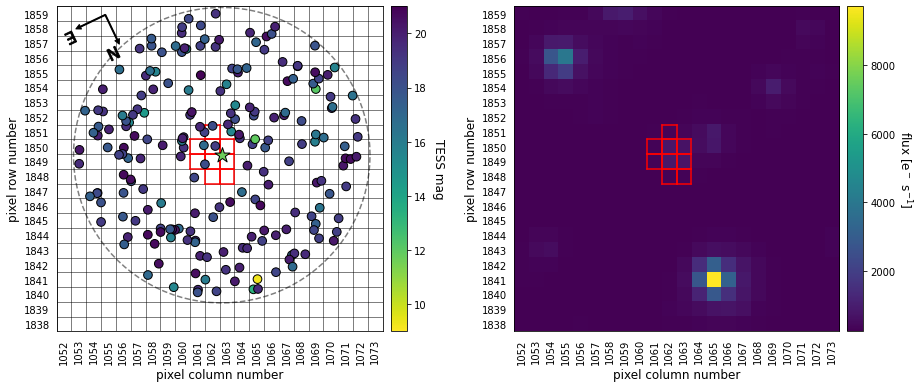

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,151825527,11.6739,10.360,9.698,9.507,167.990389,-39.327793,0.539888,0.544068,3659.0,14.917200,0.000,0.000
1,942091824,18.8466,NaN,NaN,NaN,167.991344,-39.332140,NaN,NaN,5384.0,-0.011344,15.874,170.353
2,942091823,18.2335,NaN,NaN,NaN,167.999982,-39.327342,NaN,NaN,5382.0,0.287319,26.763,86.524
3,151825522,16.7856,15.877,15.368,15.193,167.996347,-39.334297,0.900000,0.765181,5251.0,0.497939,28.695,144.680
4,942092001,19.2385,NaN,NaN,NaN,167.978522,-39.330798,NaN,NaN,NaN,1.702780,34.772,251.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,151792049,15.6344,14.860,14.579,14.422,167.920204,-39.340254,1.020000,1.038330,5708.0,0.545641,200.511,257.050
203,151825486,19.2858,16.478,15.825,15.421,167.962540,-39.379330,NaN,NaN,NaN,NaN,201.078,202.668
204,151792036,16.4924,15.405,15.010,14.815,167.918156,-39.327223,0.780000,0.833176,4802.0,0.650296,201.159,270.562
205,151825501,17.2362,16.222,15.850,15.021,168.042776,-39.366459,0.780000,0.871206,4820.0,0.391042,201.607,133.680


In [4]:
ap = np.array([[1062, 1848], [1063, 1848], [1061, 1849], [1062, 1849],
               [1063, 1849], [1061, 1850], [1062, 1850], [1063, 1850], 
               [1062, 1851]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,151825527,11.6739,10.360,9.698,9.507,167.990389,-39.327793,0.539888,0.544068,3659.0,14.917200,0.000,0.000,9.596495e-01,0.008194
1,942091824,18.8466,NaN,NaN,NaN,167.991344,-39.332140,NaN,NaN,5384.0,-0.011344,15.874,170.353,1.267710e-03,0.000000
2,942091823,18.2335,NaN,NaN,NaN,167.999982,-39.327342,NaN,NaN,5382.0,0.287319,26.763,86.524,2.063114e-03,0.000000
3,151825522,16.7856,15.877,15.368,15.193,167.996347,-39.334297,0.900000,0.765181,5251.0,0.497939,28.695,144.680,7.621999e-03,0.000000
4,942092001,19.2385,NaN,NaN,NaN,167.978522,-39.330798,NaN,NaN,NaN,1.702780,34.772,251.870,1.759355e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,151792049,15.6344,14.860,14.579,14.422,167.920204,-39.340254,1.020000,1.038330,5708.0,0.545641,200.511,257.050,1.376160e-31,0.000000
203,151825486,19.2858,16.478,15.825,15.421,167.962540,-39.379330,NaN,NaN,NaN,NaN,201.078,202.668,3.495072e-27,0.000000
204,151792036,16.4924,15.405,15.010,14.815,167.918156,-39.327223,0.780000,0.833176,4802.0,0.650296,201.159,270.562,6.215958e-33,0.000000
205,151825501,17.2362,16.222,15.850,15.021,168.042776,-39.366459,0.780000,0.871206,4820.0,0.391042,201.607,133.680,6.401657e-26,0.000000


# Ploting CC File

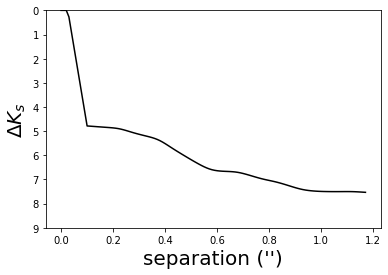

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [ ]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  7.161873538663599e-09
NFPP =  1.4516534442137402e-46


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,151825527,TP,0.539888,0.544068,3.633559,88.499338,0.392588,0.060048,349.847628,5.238078,0.000000,0.000000,9.559977e-01
1,151825527,EB,0.539888,0.544068,3.633559,84.177861,1.932114,0.065560,334.149949,0.000000,0.510305,0.515035,6.456805e-213
2,151825527,EBx2P,0.539888,0.544068,7.267118,87.642318,0.934010,0.497857,182.045630,0.000000,0.526709,0.534019,5.083519e-28
3,151825527,PTP,0.539888,0.544068,3.633559,89.383833,0.150046,0.143036,18.360131,5.864033,0.000000,0.000000,9.353615e-04
4,151825527,PEB,0.539888,0.544068,3.633559,84.263087,1.817032,0.072683,11.921348,0.000000,0.504586,0.508329,4.469012e-189
5,151825527,PEBx2P,0.539888,0.544068,7.267118,87.413025,1.243759,0.337492,188.432656,0.000000,0.516892,0.522726,1.415351e-26
6,151825527,STP,0.454803,0.453267,3.633559,89.966081,0.009702,0.029311,79.633777,7.168949,0.000000,0.000000,5.810730e-33
7,151825527,SEB,0.125340,0.153553,3.633559,89.402669,0.155064,0.689657,162.251472,0.000000,0.023513,0.100000,2.080522e-34
8,151825527,SEBx2P,0.248099,0.273010,7.267118,88.581740,0.902613,0.422271,176.273516,0.000000,0.242123,0.267750,2.486297e-27
9,151825527,DTP,0.539888,0.544068,3.633559,88.589857,0.295488,0.197499,75.704634,5.259065,0.000000,0.000000,4.306697e-02


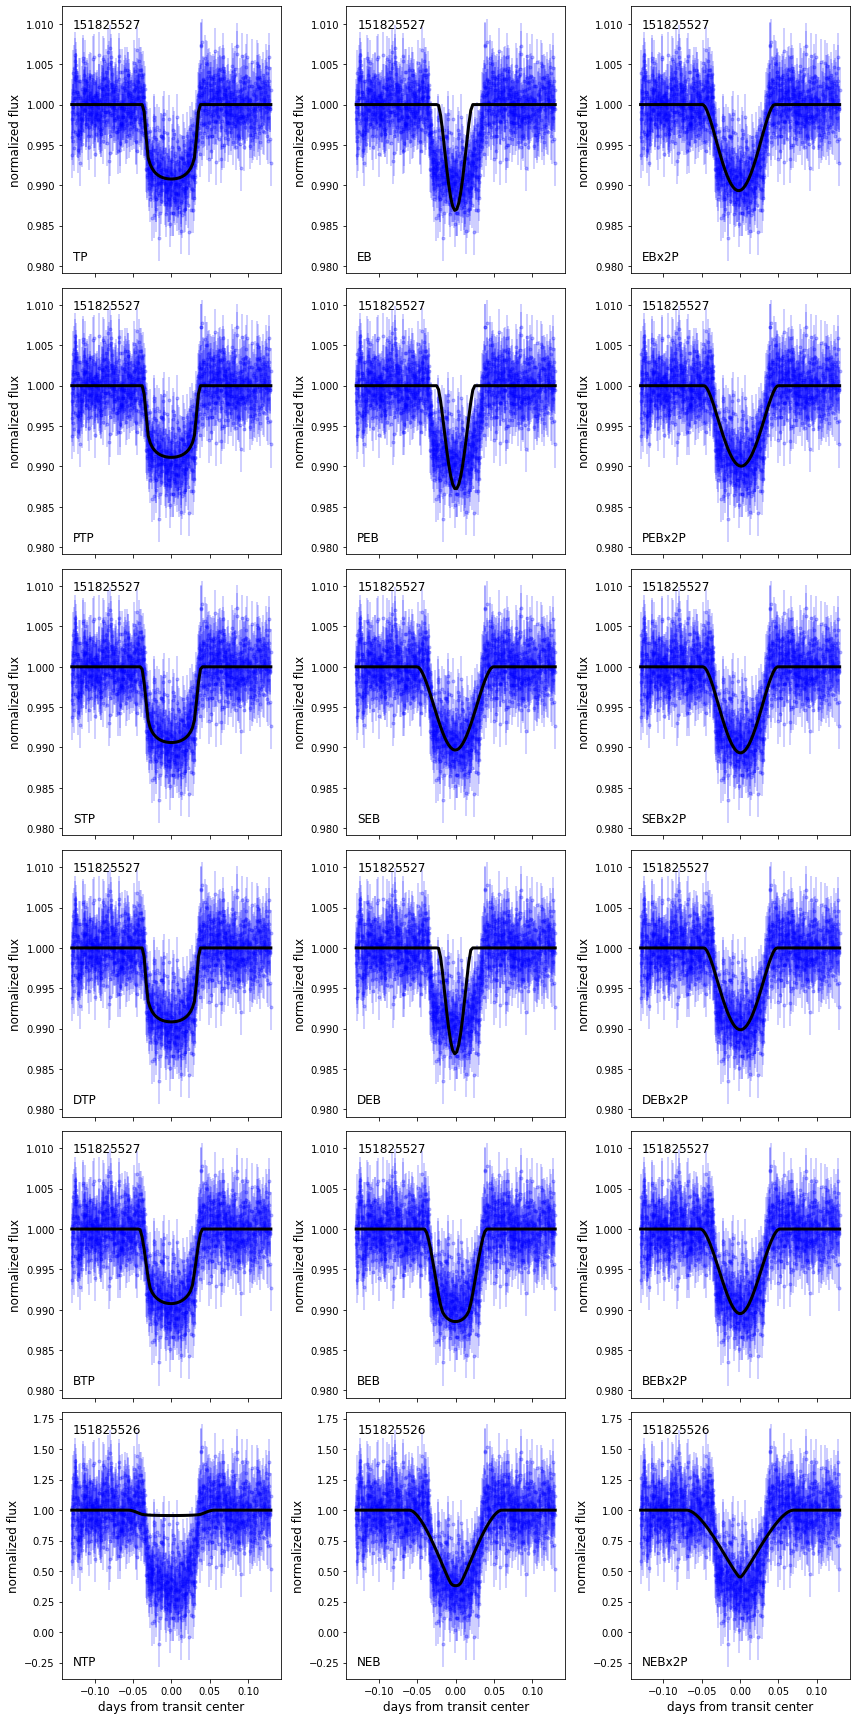

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

## Sector 09

In [4]:
# Sector 09
# Filter: 562 nm
FPP_09562 = [1.7857670897569733e-10, 2.5404840120479832e-08, 1.1813413580696874e-09, 1.133442184553246e-08,
             8.464298040244955e-09, 1.2087504330793308e-08, 3.323725961124069e-09, 8.924889716155349e-10,
             2.9930502520869595e-12, 3.2724706722220276e-08, 6.224798454468328e-12, 7.2046970611694405e-09, 
             1.1595169269185135e-12, 1.2667644710973036e-12]

NFPP_09562 = [4.842685800187467e-14, 2.4896294872496835e-13, 1.4001626642789337e-13, 1.1672290755965998e-13, 
              1.8090455379339795e-13, 1.13142054836095e-12, 2.376647993119916e-13, 2.321391548579192e-13,
              4.8554753913536226e-14, 3.086537932222922e-13, 4.0070926172690293e-13, 7.45647429325755e-14, 
              2.301396439797452e-13, 1.2781481345919573e-13]

print("Sector 09")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_09562),"+/-",np.std(FPP_09562))
print("   NFPP = ",np.mean(NFPP_09562),"+/-",np.std(NFPP_09562))

Sector 09
Filter: 562 nm
   FPP  =  7.343446089309274e-09 +/- 9.902184478245745e-09
   NFPP =  2.5190678901949307e-13 +/- 2.6260012514246013e-13


In [9]:
# Sector 09
# Filter: 832 nm
FPP_09832 = [3.072331278275442e-11, 3.820360453543614e-07, 1.0656023952115845e-08, 8.223816960750696e-09,
             3.7725735446692e-07, 1.55797276524261e-07, 2.6068036618198676e-13, 7.451936068214593e-09,
             1.103194535723162e-08, 9.606355400038069e-08, 7.52287121486006e-12, 1.7370218847734265e-06,
             4.855671420500585e-12, 2.814091715208633e-08]

NFPP_09832 = [5.02160423110585e-14, 1.2159887239828215e-13, 2.5566165870567956e-13, 1.1409558392618388e-13,
              1.2378182141766832e-13, 7.855103865345849e-14, 4.7556073173440853e-14, 2.4845696962934984e-13,
              7.991683202325986e-14, 1.970686100858094e-13, 4.529044568108972e-14, 1.0606159620270846e-13,
              4.3960422622101607e-14, 1.7039282353363845e-13]

print("Sector 09")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_09832),"+/-",np.std(FPP_09832))
print("   NFPP = ",np.mean(NFPP_09832),"+/-",np.std(NFPP_09832))

Sector 09
Filter: 832 nm
   FPP  =  2.0098029408182378e-07 +/- 4.451859889260941e-07
   NFPP =  1.201863421688378e-13 +/- 6.991624303018415e-14


# Sector 10

In [9]:
# Sector 10
# Filter: 562 nm
FPP_10562 = [1.3768985951401191e-12, 2.4672486276244854e-12, 1.3848772129065878e-09, 2.1003154770937726e-10,
             1.978508135103141e-09, 2.4069635173873394e-13, 8.714140520282854e-13, 3.473887844052115e-12,
             5.475619957451272e-13, 2.9645752519513735e-10, 1.0645668790942864e-09, 1.1612913963787719e-09,
             4.2635157626591536e-09, 7.778548257841855e-06]

NFPP_10562 = [9.37621110373914e-13, 6.016316303686863e-13, 5.774050021657118e-13, 2.326287170810237e-13,
              1.0166181360561773e-12, 1.7487018314768417e-13, 8.703138419797068e-13, 4.3895134566989456e-13,
              5.343440058428421e-13, 3.2099566524931936e-13, 3.310391904255359e-13, 5.188238146888204e-13,
              3.4359042422055675e-13, 3.0138573800597226e-13]

print("Sector 10")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_10562),"+/-",np.std(FPP_10562))
print("   NFPP = ",np.mean(NFPP_10562),"+/-",np.std(NFPP_10562))

Sector 10
Filter: 562 nm
   FPP  =  5.563511774291692e-07 +/- 2.0030773960987925e-06
   NFPP =  5.14301343233989e-13 +/- 2.5578387560418043e-13


In [8]:
# Sector 10
# Filter: 832 nm
FPP_10832 = [4.896599126169576e-09, 7.310818617156656e-13, 9.54026546651221e-09, 7.225753995143691e-09,
             2.833622225750787e-12, 1.1939338406818933e-12, 3.8136160895874127e-13, 4.116756269212374e-09,
             9.520162436160717e-13, 1.4444001550373287e-12, 5.775713241007452e-12, 1.8796447853741682e-07,
             1.663580828648037e-09, 1.4692855643261282e-07, 2.560259781958507e-10]

NFPP_10832 = [8.328011319467965e-13, 4.83515014351154e-13, 6.122737767699672e-13, 1.0960264010403758e-12,
              2.2248683968431105e-13, 7.431714300725586e-13, 3.4464761059899303e-13, 1.4941641998138038e-13,
              9.353343818295514e-13, 6.327085237928776e-13, 4.907630942555354e-13, 2.261654620821845e-13,
              3.6060812891670615e-13, 5.626667199210455e-13, 5.333358520375127e-13]

print("Sector 10")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_10832),"+/-",np.std(FPP_10832))
print("   NFPP = ",np.mean(NFPP_10832),"+/-",np.std(NFPP_10832))

Sector 10
Filter: 832 nm
   FPP  =  2.4173688584205878e-08 +/- 5.676860824953386e-08
   NFPP =  5.483947191520633e-13 +/- 2.6250159855713625e-13


## Sector 36

In [10]:
# Sector 36
# Filter: 562 nm
FPP_36562 = [3.3306690738754696e-16, 1.9317880628477724e-14, 4.797273689405301e-13, 4.989741841932016e-09,
             0.00011968485157420883, 7.642914289451852e-06, 1.1102230246251565e-16, 3.0401229589305245e-07,
             5.743791375856233e-08, 3.6637359812630166e-14, 2.382538610845586e-13, 7.837053672687944e-09,
             3.1884119233716035e-08, 7.170247617871439e-09]

NFPP_36562 = [2.1057338451868923e-46, 1.8445193803928572e-46, 1.3947781944446212e-46, 2.771797271453447e-46,
              1.6497686677214524e-46, 6.433452492619929e-46, 2.16317668435002e-46, 2.8549865251136496e-46,
              4.8877577386301324e-46, 2.335158556487867e-46, 7.224673636707169e-46, 1.2428956762951498e-46,
              4.990702432492106e-46, 3.7215384742934e-46]

print("Sector 36")
print("Filter: 562 nm")
print("   FPP  = ",np.mean(FPP_36562),"+/-",np.std(FPP_36562))
print("   NFPP = ",np.mean(NFPP_36562),"+/-",np.std(NFPP_36562))

Sector 36
Filter: 562 nm
   FPP  =  9.124364143575647e-06 +/- 3.07262317174346e-05
   NFPP =  3.2586385411563345e-46 +/- 1.8436107733078022e-46


In [9]:
# Sector 36
# Filter: 832 nm
FPP_36832 = [1.5280332554823417e-11, 1.2004232829987416e-08, 3.1519231669108194e-13, 7.204703500462983e-11,
             1.536305678229155e-07, 7.730584772325244e-07, 2.2274382338594023e-10, 2.220446049250313e-16, 
             0.0, 1.1102230246251565e-16, 0.0, 1.249753633913997e-10,
             1.6708856520608606e-13, 7.161873538663599e-09]

NFPP_36832 = [2.2755813792736887e-46, 2.452074889958118e-46, 1.3982729754660708e-46, 2.3624950806387514e-46,
              9.322400787559924e-47, 2.5473028081669694e-46, 2.151125927664644e-46, 1.806507344754719e-46, 
              7.288727430164032e-46, 5.104228625477169e-46, 4.566900868550908e-46, 1.8523565160258752e-46,
              1.7316262047618478e-46, 1.4516534442137402e-46]

print("Sector 36")
print("Filter: 832 nm")
print("   FPP  = ",np.mean(FPP_36832),"+/-",np.std(FPP_36832))
print("   NFPP = ",np.mean(NFPP_36832),"+/-",np.std(NFPP_36832))

Sector 36
Filter: 832 nm
   FPP  =  6.759219147088404e-08 +/- 1.995450834160777e-07
   NFPP =  2.7086495409908947e-46 +/- 1.686787031486045e-46
